In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [2]:
df= pd.read_excel('Frac_Stage_Data.xlsx')

In [3]:
df

,Time,SLUR RATE,PROP CON,TR PRESS
0,1,49.4,0.0,8560
1,2,50.1,0.0,8537
2,3,50.1,0.0,8534
3,4,49.3,0.0,8617
4,5,49.2,0.0,8646
...,...,...,...,...
4595,4596,99.1,1.0,9194
4596,4597,99.0,1.0,9201
4597,4598,99.0,1.0,9184
4598,4599,99.3,1.0,9178


Text(0, 0.5, 'Slurry Rate (bpm))')

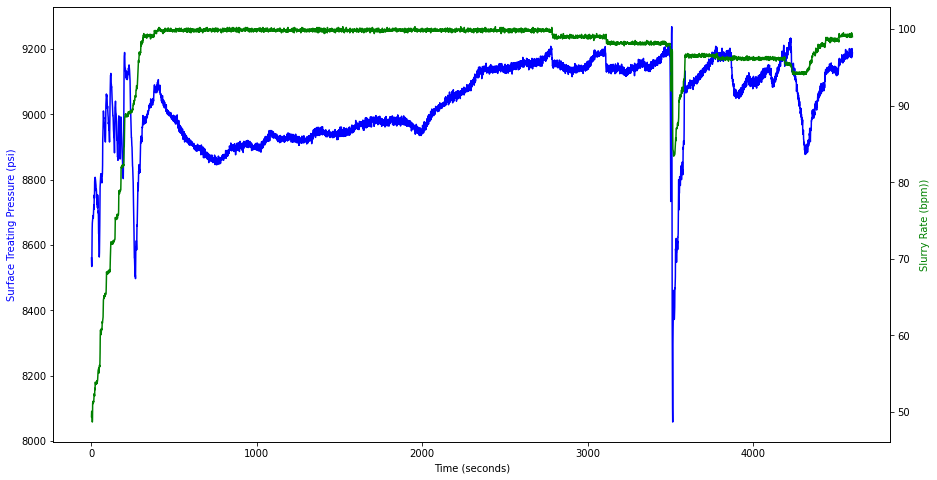

<Figure size 1080x576 with 0 Axes>

In [4]:
fig, ax = plt.subplots(figsize=(15,8))
plt.figure(figsize=(15,8))
ax1 = ax.twinx()

ax.plot(df['Time'], df['TR PRESS'], 'b')
ax1.plot(df['Time'], df['SLUR RATE'], 'g')


ax.set_xlabel('Time (seconds)')
ax.set_ylabel('Surface Treating Pressure (psi)', color='b')
ax1.set_ylabel('Slurry Rate (bpm))', color='g')

In [5]:
start_time = 1
end_time = 4500
filter = (df['Time'] > start_time) & (df['Time'] <= end_time)
df_training = df.loc[filter].copy()
df_training

,Time,SLUR RATE,PROP CON,TR PRESS
1,2,50.1,0.0,8537
2,3,50.1,0.0,8534
3,4,49.3,0.0,8617
4,5,49.2,0.0,8646
5,6,48.7,0.0,8667
...,...,...,...,...
4495,4496,98.7,1.0,9127
4496,4497,98.8,1.0,9125
4497,4498,98.5,1.0,9131
4498,4499,98.4,1.0,9136


In [6]:
start_time2 = 4500
end_time2 = 4600
filter2 = (df['Time'] > start_time2) & (df['Time'] <= end_time2)
df_testing = df.loc[filter2].copy()
df_testing

,Time,SLUR RATE,PROP CON,TR PRESS
4500,4501,98.4,1.0,9120
4501,4502,98.6,1.0,9133
4502,4503,98.7,1.0,9131
4503,4504,98.6,1.0,9125
4504,4505,98.6,1.0,9118
...,...,...,...,...
4595,4596,99.1,1.0,9194
4596,4597,99.0,1.0,9201
4597,4598,99.0,1.0,9184
4598,4599,99.3,1.0,9178


In [7]:
training_data= df_training.drop(['Time'], axis=1)
training_data

,SLUR RATE,PROP CON,TR PRESS
1,50.1,0.0,8537
2,50.1,0.0,8534
3,49.3,0.0,8617
4,49.2,0.0,8646
5,48.7,0.0,8667
...,...,...,...
4495,98.7,1.0,9127
4496,98.8,1.0,9125
4497,98.5,1.0,9131
4498,98.4,1.0,9136


In [8]:
scaler=MinMaxScaler()
training_data1= scaler.fit_transform(training_data)
pd.DataFrame(training_data1,columns=training_data.columns)


,SLUR RATE,PROP CON,TR PRESS
0,0.027132,0.0,0.395868
1,0.027132,0.0,0.393388
2,0.011628,0.0,0.461983
3,0.009690,0.0,0.485950
4,0.000000,0.0,0.503306
...,...,...,...
4494,0.968992,0.4,0.883471
4495,0.970930,0.4,0.881818
4496,0.965116,0.4,0.886777
4497,0.963178,0.4,0.890909


In [9]:
X_train= []
y_train= []
for i in range(90,training_data1.shape[0]):
    X_train.append(training_data1[i-90:i])
    y_train.append(training_data1[i,2])


In [10]:
X_train, y_train = np.array(X_train), np.array(y_train)
X_train.shape, y_train.shape

((4409, 90, 3), (4409,))

In [11]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,LSTM, Dropout
import tensorflow as tf
import random as python_random

In [12]:
def reset_seeds():
    np.random.seed(100) 
    python_random.seed(100)
    tf.random.set_seed(100)

reset_seeds() 

Frac_LSTM = Sequential()

Frac_LSTM.add(LSTM(units=200, activation='relu', return_sequences=True, input_shape=(X_train.shape[1],3)))
Frac_LSTM.add(Dropout(0.3))

Frac_LSTM.add(LSTM(units=200, activation='relu', return_sequences=True))
Frac_LSTM.add(Dropout(0.3))


Frac_LSTM.add(LSTM(units=200, activation='relu'))
Frac_LSTM.add(Dropout(0.3))

Frac_LSTM.add(Dense(units=1))

In [13]:
Frac_LSTM.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 90, 200)           163200    
_________________________________________________________________
dropout (Dropout)            (None, 90, 200)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 90, 200)           320800    
_________________________________________________________________
dropout_1 (Dropout)          (None, 90, 200)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 200)               320800    
_________________________________________________________________
dropout_2 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 2

In [14]:
Frac_LSTM.compile(optimizer='adam', loss='mean_squared_error')

In [15]:
history=Frac_LSTM.fit(X_train,y_train, epochs=10, batch_size=32, shuffle=True)

Epoch 1/10
138/138 [==============================] - 74s 539ms/step - loss: 0.0834
Epoch 2/10
138/138 [==============================] - 46s 336ms/step - loss: 0.0076
Epoch 3/10
138/138 [==============================] - 39s 285ms/step - loss: 0.0070
Epoch 4/10
138/138 [==============================] - 38s 274ms/step - loss: 0.0061
Epoch 5/10
138/138 [==============================] - 36s 264ms/step - loss: 0.0056
Epoch 6/10
138/138 [==============================] - 36s 261ms/step - loss: 0.0055
Epoch 7/10
138/138 [==============================] - 36s 261ms/step - loss: 0.0053
Epoch 8/10
138/138 [==============================] - 36s 261ms/step - loss: 0.0052
Epoch 9/10
138/138 [==============================] - 38s 272ms/step - loss: 0.0042
Epoch 10/10
138/138 [==============================] - 37s 269ms/step - loss: 0.0043


In [19]:
df_testing.head()
past_90_secs= df_training.tail(90)
df1=past_90_secs.append(df_testing,ignore_index=True)
df1=df.drop(['Time'], axis=1)
df1

,SLUR RATE,PROP CON,TR PRESS
0,49.4,0.0,8560
1,50.1,0.0,8537
2,50.1,0.0,8534
3,49.3,0.0,8617
4,49.2,0.0,8646
...,...,...,...
4595,99.1,1.0,9194
4596,99.0,1.0,9201
4597,99.0,1.0,9184
4598,99.3,1.0,9178


In [24]:
testing_inputs= scaler.transform(df1)
X_test=[]
y_test=[]
testing_inputs.shape[0]

4600

In [25]:
for i in range(90,testing_inputs.shape[0]):
    X_test.append(testing_inputs[i-90:i])
    y_test.append(testing_inputs[i,2])
    
X_test, y_test= np.array(X_test), np.array(y_test)

X_test.shape, y_test.shape


((4510, 90, 3), (4510,))

In [26]:
y_pred=Frac_LSTM.predict(X_test)
y_pred=pd.DataFrame(y_pred,columns=['Predicted TR PRESS'])
y_pred.head()


,Predicted TR PRESS
0,0.782775
1,0.785105
2,0.788413
3,0.792357
4,0.796649


In [27]:
y_pred.describe()

,Predicted TR PRESS
count,4510.000000
mean,0.800455
std,0.091251
min,0.203487
25%,0.728425
50%,0.816010
75%,0.882054
max,0.922453


In [29]:
y_pred['Predicted TR PRESS']=y_pred['Predicted TR PRESS']*(df['TR PRESS'].max()-df['TR PRESS'].min())+(df['TR PRESS'].min())


In [30]:
y_test=pd.DataFrame(y_test,columns=['Actual TR PRESS'])
y_test['Actual TR PRESS']=y_test['Actual TR PRESS']*(df['TR PRESS'].max()-df['TR PRESS'].min())+(df['TR PRESS'].min())
y_test.head()

,Actual TR PRESS
0,9062.0
1,9055.0
2,9054.0
3,9059.0
4,9052.0


In [31]:
y_pred['Predicted TR PRESS'].head()

0    9005.158203
1    9007.976562
2    9011.979492
3    9016.751953
4    9021.944336
Name: Predicted TR PRESS, dtype: float32

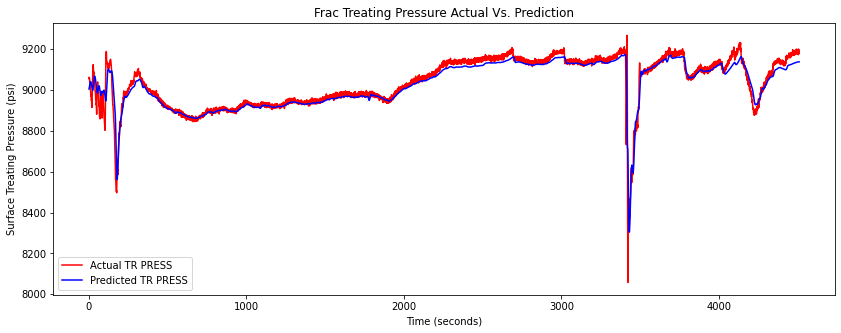

In [32]:
plt.figure(figsize=(14,5))
plt.plot(y_test, color='red', label='Actual TR PRESS')
plt.plot(y_pred['Predicted TR PRESS'], color='blue', label='Predicted TR PRESS')
plt.title('Frac Treating Pressure Actual Vs. Prediction')
plt.xlabel('Time (seconds)')
plt.ylabel('Surface Treating Pressure (psi)')
plt.legend()

In [33]:
import pypandoc

In [34]:
pypandoc.convert('Assignment 15.md','docx',outputfile='Assigment 15.docx')

C:\Users\aashr\.conda\envs\tf\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Due to possible ambiguity, 'convert()' is deprecated. Use 'convert_file()'  or 'convert_text()'.
  """Entry point for launching an IPython kernel.


''